In [1]:
!pip install python-whois

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 2.9 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import os
import shutil
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.parse import urlencode, urlparse
import ipaddress
import re
import whois

In [3]:
df = pd.read_csv('/kaggle/input/malicious-urls-dataset/malicious_phish.csv')
df.head(10)

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign
8,http://www.pashminaonline.com/pure-pashminas,defacement
9,allmusic.com/album/crazy-from-the-heat-r16990,benign


In [4]:
df['type'].value_counts().reset_index()

,type,count
0,benign,428103
1,defacement,96457
2,phishing,94111
3,malware,32520


In [5]:
df.shape

(651191, 2)

In [6]:
df = df.drop(df[df['type'] == 'malware'].index)
df = df.drop(df[df['type'] == 'defacement'].index)

In [7]:
df.shape

(522214, 2)

<Axes: xlabel='type', ylabel='count'>

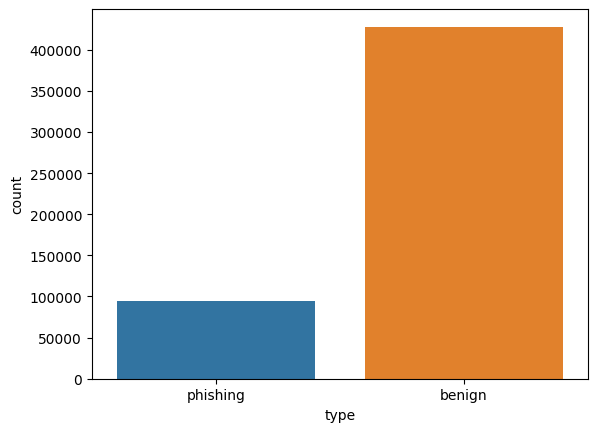

In [8]:
sns.countplot(df, x = 'type')

In [9]:
# def havingIP(url):
#     try:
#         ipaddress.ip_address(url)
#         ip = 1
#     except:
#         ip = 0
#     return ip

In [10]:
# havingIP('https://www.amazon.in/')

In [11]:
# df = rank_type(df)

In [12]:
df = df.reset_index(drop=True)

In [13]:
df.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign
4,espn.go.com/nba/player/_/id/3457/brandon-rush,benign


* having ip getting 0's in all urls -> not used
* domain of url -> done
* @ symbol in url -> done
* length of url -> done
* depth of url -> done
* redirection "//" in url -> done
* http/https in domain name -> done
* prefix or suffix in domain -> done

In [14]:
# 1.Domain of the URL (Domain) 
def getDomain(url):  
    domain = urlparse(url).netloc
    if re.match(r"^www.",domain):
        domain = domain.replace("www.","")
    return domain

getDomain(df['url'][3])

'buzzfil.net'

In [15]:
def haveAtSign(url):
    if "@" in url:
        at = 1    
    else:
        at = 0    
    return at

haveAtSign('https://@.com')

1

In [16]:
def get_depth(url):
    s = urlparse(url).path.split('/')
    depth = 0
    for j in range(len(s)):
        if len(s[j]) != 0:
            depth += 1
    
    return depth

In [17]:
# 1 shows a phishing and 0 shows a original
def redirection(url):
    pos = url.rfind('//')
#     print(pos)
    if pos > 5:
        if pos > 6:
            return 1
        else:
            return 0
    else:
        return 0

In [18]:
redirection(df['url'][5])

0

In [19]:
# check the domain contains a https or not
def httpsDomain(url):
    domain = urlparse(url).scheme
    
#     print(domain)
    if 'https' == domain:
        return 1
    else:
        return 0

httpsDomain('http://www.amazon.in/')

0

In [20]:
def prefixSuffix(url):
    if '-' in urlparse(url).netloc:
        return 1
    else:
        return 0

In [21]:
def length_url(url):
    if len(url) < 54:
        return 0
    else:
        return 1

In [22]:
length_url('https://www.amazon.in/shoes/')

0

In [23]:
df['domain'] = df['url'].apply(getDomain)
df['have@'] = df['url'].apply(haveAtSign)
df['have_depth'] = df['url'].apply(get_depth)
df['redirect'] = df['url'].apply(redirection)
df['https_domain'] = df['url'].apply(httpsDomain)
df['prefix_Suffix'] = df['url'].apply(prefixSuffix)
df['length_urls'] = df['url'].apply(length_url)
# df['having_ip'] = df['url'].apply(havingIP)

In [24]:
df.head()

,url,type,domain,have@,have_depth,redirect,https_domain,prefix_Suffix,length_urls
0,br-icloud.com.br,phishing,,0,1,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,,0,3,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,,0,4,0,0,0,0
3,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign,buzzfil.net,0,3,0,0,0,1
4,espn.go.com/nba/player/_/id/3457/brandon-rush,benign,,0,7,0,0,0,0


In [25]:
df.replace("", np.nan, inplace=True)

In [26]:
df.head()

,url,type,domain,have@,have_depth,redirect,https_domain,prefix_Suffix,length_urls
0,br-icloud.com.br,phishing,NaN,0,1,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,NaN,0,3,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,NaN,0,4,0,0,0,0
3,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign,buzzfil.net,0,3,0,0,0,1
4,espn.go.com/nba/player/_/id/3457/brandon-rush,benign,NaN,0,7,0,0,0,0


In [27]:
df  = df.dropna(subset=['domain'])
df.head()

,url,type,domain,have@,have_depth,redirect,https_domain,prefix_Suffix,length_urls
3,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign,buzzfil.net,0,3,0,0,0,1
19,http://hollywoodlife.com/2014/05/01/rihanna-ih...,benign,hollywoodlife.com,0,4,0,0,0,1
20,http://www.marketingbyinternet.com/mo/e56508df...,phishing,marketingbyinternet.com,0,2,0,0,0,1
29,https://docs.google.com/spreadsheet/viewform?f...,phishing,docs.google.com,0,2,0,1,0,1
37,http://interpark.com/displaycorner/FreeMarket....,benign,interpark.com,0,2,0,0,0,1


In [28]:
df = df.reset_index(drop = True)

In [29]:
df.head()

,url,type,domain,have@,have_depth,redirect,https_domain,prefix_Suffix,length_urls
0,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign,buzzfil.net,0,3,0,0,0,1
1,http://hollywoodlife.com/2014/05/01/rihanna-ih...,benign,hollywoodlife.com,0,4,0,0,0,1
2,http://www.marketingbyinternet.com/mo/e56508df...,phishing,marketingbyinternet.com,0,2,0,0,0,1
3,https://docs.google.com/spreadsheet/viewform?f...,phishing,docs.google.com,0,2,0,1,0,1
4,http://interpark.com/displaycorner/FreeMarket....,benign,interpark.com,0,2,0,0,0,1


In [30]:
df.shape

(60232, 9)

<Axes: xlabel='type', ylabel='count'>

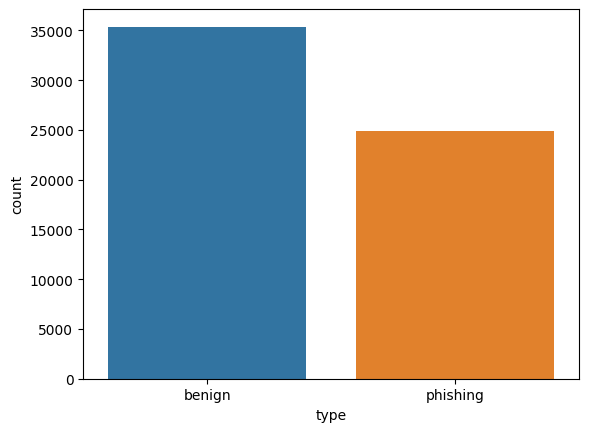

In [31]:
sns.countplot(df, x = 'type')

In [32]:
df.drop(columns = ['url'], inplace = True)

In [33]:
df.head()

,type,domain,have@,have_depth,redirect,https_domain,prefix_Suffix,length_urls
0,benign,buzzfil.net,0,3,0,0,0,1
1,benign,hollywoodlife.com,0,4,0,0,0,1
2,phishing,marketingbyinternet.com,0,2,0,0,0,1
3,phishing,docs.google.com,0,2,0,1,0,1
4,benign,interpark.com,0,2,0,0,0,1


In [34]:
def rank_type(df):
    type_rank = {
        'phishing': 1,
        'benign': 0
    }
    
    df['Type'] = df['type'].map(type_rank)
    
    return df

In [35]:
df = rank_type(df)
df.head()

,type,domain,have@,have_depth,redirect,https_domain,prefix_Suffix,length_urls,Type
0,benign,buzzfil.net,0,3,0,0,0,1,0
1,benign,hollywoodlife.com,0,4,0,0,0,1,0
2,phishing,marketingbyinternet.com,0,2,0,0,0,1,1
3,phishing,docs.google.com,0,2,0,1,0,1,1
4,benign,interpark.com,0,2,0,0,0,1,0


In [36]:
df.drop(columns = ['type'], inplace = True)

In [37]:
df.head(5)

,domain,have@,have_depth,redirect,https_domain,prefix_Suffix,length_urls,Type
0,buzzfil.net,0,3,0,0,0,1,0
1,hollywoodlife.com,0,4,0,0,0,1,0
2,marketingbyinternet.com,0,2,0,0,0,1,1
3,docs.google.com,0,2,0,1,0,1,1
4,interpark.com,0,2,0,0,0,1,0


In [38]:
# lt = []

# def check_dns(domain):
#     dns = 0
#     try:
#         # Parse the domain and check WHOIS information
#         domain_name = whois.whois(domain)
# #         print(domain_name)
#     except Exception as e:  # Catch all exceptions and handle accordingly
#         dns = 1
    
#     # Append the result to the list
#     lt.append(dns)

# # Iterate over each domain in the DataFrame
# for domain in df['domain']:
#     check_dns(domain)

In [39]:
# len(lt)

In [40]:
# # Count the number of `1`s in the `lt` list
# count_of_ones = lt.count(1)

# # Print the result
# print(f"Number of domains with invalid DNS records: {count_of_ones}")

In [41]:
data = pd.read_csv('/kaggle/input/urldata/urldata.csv')
data.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0


In [42]:
from datetime import datetime

def domain_age(domain_name):
    domain_name = whois.whois(domain_name)
    creation_date = domain_name.creation_date
    expiration_date = domain_name.expiration_date
    
    # Convert dates from string if necessary
    if isinstance(creation_date, str) or isinstance(expiration_date, str):
        try:
            creation_date = datetime.strptime(creation_date, '%Y-%m-%d')
            expiration_date = datetime.strptime(expiration_date, "%Y-%m-%d")
        except:
            return -1  # Indicates an error in date parsing
    
    # Handle cases where dates might be None or lists
    if creation_date is None or expiration_date is None:
        return -1  # Indicates missing date information
    if isinstance(creation_date, list) or isinstance(expiration_date, list):
        return -1  # Indicates date is a list rather than a single datetime object
    
    # Calculate the age of the domain in days
    try:
        age_of_domain = (expiration_date - creation_date).days
        return age_of_domain
    except:
        return -1  # Indicates an error in date calculation


# Get domain age in days
age = domain_age(data['Domain'][3])
print(f"Domain age in days: {age}")


Domain age in days: 5114


In [43]:
data.drop(columns = ['TinyURL', 'Web_Traffic', 'Domain_End', 'iFrame', 'Mouse_Over', 'Right_Click', 'Web_Forwards'], inplace = True)

In [44]:
data.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,Prefix/Suffix,DNS_Record,Domain_Age,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,1,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,1,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,0


In [45]:
x = data.iloc[:, 1: -1]
y = data.iloc[:,-1]

In [46]:
x

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,Prefix/Suffix,DNS_Record,Domain_Age
0,0,0,1,1,0,0,0,0,1
1,0,0,1,1,1,0,0,0,1
2,0,0,1,1,0,0,0,0,0
3,0,0,1,3,0,0,0,0,0
4,0,0,1,3,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
9995,0,0,1,5,0,0,1,0,1
9996,0,0,1,4,0,0,0,0,0
9997,0,1,1,3,0,0,0,0,1
9998,0,0,1,5,0,0,1,0,1


In [47]:
y.shape

(10000,)

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.2, stratify=data['Label'], random_state=42)

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [51]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(x_train, y_train)
    
    # Make predictions
    y_pred = model.predict(x_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(f"Classification Report for {name}:\n{classification_report(y_test, y_pred)}\n")
    print(f"Confusion Matrix for {name}:\n{confusion_matrix(y_test, y_pred)}\n")


Logistic Regression Accuracy: 0.7765
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.70      0.96      0.81      1000
           1       0.93      0.60      0.73      1000

    accuracy                           0.78      2000
   macro avg       0.82      0.78      0.77      2000
weighted avg       0.82      0.78      0.77      2000


Confusion Matrix for Logistic Regression:
[[956  44]
 [403 597]]

Decision Tree Accuracy: 0.8065
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.77      0.87      0.82      1000
           1       0.85      0.74      0.79      1000

    accuracy                           0.81      2000
   macro avg       0.81      0.81      0.81      2000
weighted avg       0.81      0.81      0.81      2000


Confusion Matrix for Decision Tree:
[[869 131]
 [256 744]]

Random Forest Accuracy: 0.8065
Classification Report for Rando

In [52]:
from sklearn.model_selection import StratifiedKFold

In [53]:
avg_accuracies = {name: [] for name in models.keys()}

# Initialize StratifiedKFold with 5 splits
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform 5-fold cross-validation
for train_index, test_index in kf.split(x, y):
    X_train, X_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    for name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        avg_accuracies[name].append(accuracy)

# Calculate the average accuracy for each model
for name in avg_accuracies.keys():
    avg_accuracy = np.mean(avg_accuracies[name])
    print(f"Average Accuracy for {name}: {avg_accuracy:.4f}")

Average Accuracy for Logistic Regression: 0.7854
Average Accuracy for Decision Tree: 0.8075
Average Accuracy for Random Forest: 0.8089
Average Accuracy for Gradient Boosting: 0.8078
Average Accuracy for XGBoost: 0.8059


In [54]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [55]:
models = {
    "Logistic Regression": Pipeline([
        ('scaler', StandardScaler()), 
        ('clf', LogisticRegression(max_iter=1000, penalty='l2', C=1.0))
    ]),
    "Decision_Tree": Pipeline([
        ('clf', DecisionTreeClassifier(max_depth=10, min_samples_split=10))
    ]),
    "Random Forest": Pipeline([
        ('clf', RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=10))
    ]),
    "Gradient Boosting": Pipeline([
        ('clf', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3))
    ]),
    "XGBoost": Pipeline([
        ('clf', XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=100, max_depth=3, learning_rate=0.1))
    ])
}

# Initialize a dictionary to store average accuracies
avg_accuracies = {name: [] for name in models.keys()}

# Initialize StratifiedKFold with 5 splits
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform 5-fold cross-validation
for train_index, test_index in kf.split(x, y):
    X_train, X_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    for name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        avg_accuracies[name].append(accuracy)

# Calculate the average accuracy for each model
for name in avg_accuracies.keys():
    avg_accuracy = np.mean(avg_accuracies[name])
    print(f"Average Accuracy for {name}: {avg_accuracy:.4f}")

# Find the best model based on average accuracy
best_model_name = max(avg_accuracies, key=lambda k: np.mean(avg_accuracies[k]))
best_model_avg_accuracy = np.mean(avg_accuracies[best_model_name])

print(f"\nBest Model: {best_model_name} with Average Accuracy: {best_model_avg_accuracy:.4f}")


Average Accuracy for Logistic Regression: 0.7864
Average Accuracy for Decision_Tree: 0.8079
Average Accuracy for Random Forest: 0.8066
Average Accuracy for Gradient Boosting: 0.8078
Average Accuracy for XGBoost: 0.8061

Best Model: Decision_Tree with Average Accuracy: 0.8079


In [56]:
best_model = models[best_model_name]
best_model.fit(x, y)

Pipeline(steps=[('clf',
                 DecisionTreeClassifier(max_depth=10, min_samples_split=10))])

In [57]:
import pickle
pickle_file = f"{best_model_name}_best_model.pkl"
with open(pickle_file, 'wb') as file:
    pickle.dump(best_model, file)

print(f"Best model saved as {pickle_file}")

# To load the model later
with open(pickle_file, 'rb') as file:
    loaded_model = pickle.load(file)

Best model saved as Decision_Tree_best_model.pkl


In [58]:
loaded_model.predict([[1, 1, 1, 1, 1, 1, 1, 1, 1]])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [59]:
y_pred = loaded_model.predict(x_test)

In [60]:
accuracy_score(y_test, y_pred)

0.503

In [61]:
best_model.get_params()

{'memory': None,
 'steps': [('clf',
   DecisionTreeClassifier(max_depth=10, min_samples_split=10))],
 'verbose': False,
 'clf': DecisionTreeClassifier(max_depth=10, min_samples_split=10),
 'clf__ccp_alpha': 0.0,
 'clf__class_weight': None,
 'clf__criterion': 'gini',
 'clf__max_depth': 10,
 'clf__max_features': None,
 'clf__max_leaf_nodes': None,
 'clf__min_impurity_decrease': 0.0,
 'clf__min_samples_leaf': 1,
 'clf__min_samples_split': 10,
 'clf__min_weight_fraction_leaf': 0.0,
 'clf__random_state': None,
 'clf__splitter': 'best'}

In [62]:
loaded_model.get_params()

{'memory': None,
 'steps': [('clf',
   DecisionTreeClassifier(max_depth=10, min_samples_split=10))],
 'verbose': False,
 'clf': DecisionTreeClassifier(max_depth=10, min_samples_split=10),
 'clf__ccp_alpha': 0.0,
 'clf__class_weight': None,
 'clf__criterion': 'gini',
 'clf__max_depth': 10,
 'clf__max_features': None,
 'clf__max_leaf_nodes': None,
 'clf__min_impurity_decrease': 0.0,
 'clf__min_samples_leaf': 1,
 'clf__min_samples_split': 10,
 'clf__min_weight_fraction_leaf': 0.0,
 'clf__random_state': None,
 'clf__splitter': 'best'}